# Taller 1: Exploración de Datos - Estadística 3

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import math


df = pd.read_csv('data.csv', header=0)
df.drop('Unnamed: 8', axis=1, inplace=True)

# 1

## 1.1

In [36]:
for column in df.drop('City', axis=1, inplace=False):
    print(f'{column} description')
    print(f'mean: {np.mean(df[column])}')
    print(f'median: {np.median(df[column])}')
    print(f'std: {np.std(df[column])}\n')

GDP (USD Billion) description
mean: 8.750000000000002
median: 2.65
std: 19.579713140561246

Population (Millions) description
mean: 0.7310000000000001
median: 0.39
std: 1.330093605728559

Unemployment Rate (%) description
mean: 13.833333333333334
median: 13.45
std: 2.89555214462151

Average Age description
mean: 29.233333333333334
median: 29.0
std: 2.2012622641465405

Women (%) description
mean: 51.5
median: 51.0
std: 0.7637626158259734

Men (%) description
mean: 48.5
median: 49.0
std: 0.7637626158259734

Budget (USD Billion) description
mean: 1.65
median: 0.6
std: 3.3931794333142284



## 1.2

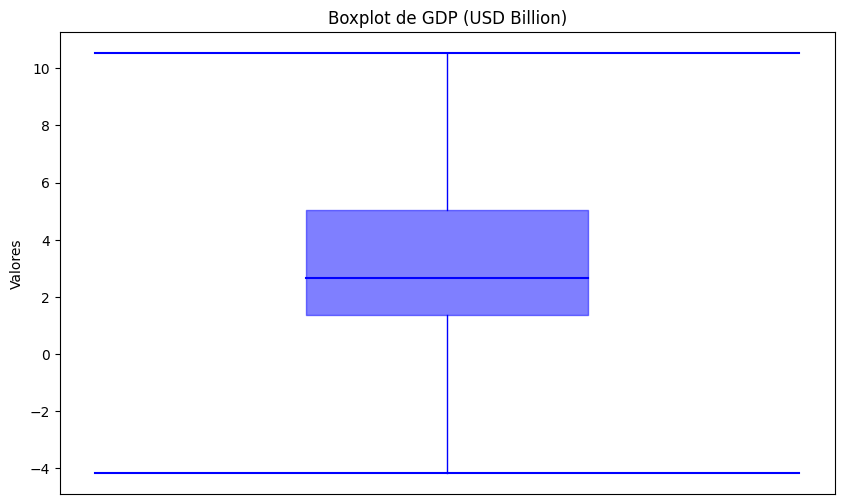

In [37]:
def createBoxplot(df, column):
    #estadísticos
    median = np.median(df[column])
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    plt.figure(figsize=(10, 6))

    #Caja
    plt.fill_betweenx([q1, q3], 0.98, 1.02, color='blue', alpha=0.5)

    #Mediana
    plt.plot([0.98, 1.02], [median, median], color='blue', lw=1.5)

    #Bigotes
    plt.plot([1, 1], [lower, q1], color='blue', lw=1)
    plt.plot([1, 1], [q3, upper], color='blue', lw=1)
    plt.plot([0.95, 1.05], [lower, lower], color='blue', lw=1.5)
    plt.plot([0.95, 1.05], [upper, upper], color='blue', lw=1.5)


    plt.xticks([])
    plt.ylabel('Valores')
    plt.title(f'Boxplot de {column}')
    plt.show()

#Ingresar el nombre de la columna que se quiere graficar    
createBoxplot(df, 'GDP (USD Billion)')

## 1.3

In [38]:
def covariance(df, x1, x2):
    mean_x1 = df[x1].mean()
    mean_x2 = df[x2].mean()
    n = len(df)
    cov = sum((df[x1] - mean_x1) * (df[x2] - mean_x2)) / n
    
    return cov

#Ingresar los nombres de las columnas que se quiere calcular la covarianza       
print(covariance(df, 'GDP (USD Billion)', 'Population (Millions)'))

25.795716666666667


## 1.4

In [39]:
def corr(df, x1, x2):
    mean_x1 = df[x1].mean()
    mean_x2 = df[x2].mean()
    numerator = sum((df[x1] - mean_x1) * (df[x2] - mean_x2))
    denominator = (sum((df[x1] - mean_x1)**2)*sum((df[x2] - mean_x2)**2))**(1/2)
    corr = numerator / denominator
    
    return corr
    
#Ingresar los nombres de las columnas que se quiere calcular la correlación
# print(corr(df, 'GDP (USD Billion)', 'Population (Millions)'))

## 1.5

La correlación y la covarianza son dos medidas estadísticas que se utilizan para evaluar la relación entre dos variables.

La covarianza mide la variabilidad conjunta de dos variables, mientras que la correlación mide la relación lineal entre ellas y proporciona una medida estandarizada de esta relación.

## 1.6

In [50]:
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Leer los datos de train y test
df_train = pd.read_csv('train.csv', header=0)
df_train.drop('Unnamed: 8', axis=1, inplace=True)
df_test = pd.read_csv('test.csv', header=0)
df_test.drop('Unnamed: 8', axis=1, inplace=True)

# Escalar los datos
scaler = StandardScaler()
scaler.fit(df_train.drop('City', axis=1, inplace=False))
df_train_scaled = scaler.transform(df_train.drop('City', axis=1, inplace=False))
df_test_scaled = scaler.transform(df_test.drop('City', axis=1, inplace=False))

# Implementar K-Means desde cero
def initialize_centroids(df, k):
    """Inicializa los centroides seleccionando k puntos aleatorios de los datos"""
    return df[np.random.choice(df.shape[0], k, replace=False)]

def assign_clusters(df, centroids):
    """Asigna cada punto al cluster más cercano"""
    distances = cdist(df, centroids, 'euclidean')
    return np.argmin(distances, axis=1)

def update_centroids(df, labels, k):
    """Recalcula los centroides como la media de todos los puntos asignados a cada cluster"""
    new_centroids = np.zeros((k, df.shape[1]))
    for i in range(k):
        points_in_cluster = df[labels == i]
        new_centroids[i, :] = points_in_cluster.mean(axis=0)
    return new_centroids

def kmeans(df, k, max_iters=100, tol=1e-4):
    """Implementación del algoritmo K-means desde cero"""
    centroids = initialize_centroids(df, k)
    
    for _ in range(max_iters):
        labels = assign_clusters(df, centroids)
        new_centroids = update_centroids(df, labels, k)
        
        # Si los centroides no cambian mucho, detener el ciclo
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Aplicar K-Means al conjunto de entrenamiento
centroids, labels = kmeans(df_train_scaled, 6)
df_train['Cluster'] = labels
# Predecir los clusters para el conjunto de prueba
df_test['Cluster_Predicted'] = assign_clusters(df_test_scaled, centroids)


# Agregar el centroide de cada ciudad en train
centroid_columns = ['Centroid_' + str(i+1) for i in range(df_train_scaled.shape[1])]
df_train[centroid_columns] = centroids[df_train['Cluster']]

# Agregar el centroide de cada ciudad en test
df_test[centroid_columns] = centroids[df_test['Cluster_Predicted']]

# Encontrar la ciudad de train más cercana al centroide del cluster de cada ciudad en el test
closest_cities = []
for i, row in df_test.iterrows():
    # Obtener el cluster predicho para la ciudad del test
    cluster_id = row['Cluster_Predicted']
    
    # Obtener el centroide del cluster correspondiente
    centroid = centroids[cluster_id]
    
    # Filtrar las ciudades de train que pertenecen a ese cluster
    cities_in_cluster = df_train[df_train['Cluster'] == cluster_id]
    
    # Escalar las ciudades del cluster en train para compararlas con el centroide
    cities_in_cluster_scaled = scaler.transform(cities_in_cluster.drop(['City', 'Cluster'] + centroid_columns, axis=1))
    
    # Calcular las distancias entre las ciudades del cluster y el centroide
    distances_to_centroid = cdist(cities_in_cluster_scaled, [centroid], 'euclidean')
    
    # Encontrar la ciudad más cercana al centroide
    closest_city_index = np.argmin(distances_to_centroid)
    closest_city = cities_in_cluster.iloc[closest_city_index]['City']
    
    # Añadir la ciudad más cercana a la lista
    closest_cities.append(closest_city)

# Añadir las ciudades más cercanas al DataFrame de test
df_test['Closest_City'] = closest_cities

# Crear el archivo de submission
df_submission = df_test[['City', 'Closest_City']]
df_submission.columns = ['ID', 'label']
df_submission.to_csv('submission.csv', index=False)


##  1.7

In [41]:
def dedograma(df):
    scaler = StandardScaler()
    df_sc = scaler.fit_transform(df.drop('City', axis=1, inplace=False))
    fig = ff.create_dendrogram(df_sc,  labels=df['City'].values)
    fig.update_layout(width=5000, height=1000)
    fig.show()

dedograma(df)

# 2

## 2.1

In [42]:
scaler = StandardScaler()
df_pca = df[['GDP (USD Billion)', 'Population (Millions)']]
df_pca_sc = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns)

cov_matrix = [[df_pca_sc['GDP (USD Billion)'].var().item(), covariance(df_pca_sc, 'GDP (USD Billion)', 'Population (Millions)' )],[covariance(df_pca_sc, 'GDP (USD Billion)', 'Population (Millions)'), df_pca_sc['Population (Millions)'].var().item()]]


## 2.2

In [43]:
def resolver_ecuacion_cuadratica(a, b, c):
    # Calcula el discriminante
    discriminante = b**2 - 4*a*c
    
    # Verifica si el discriminante es negativo, cero o positivo
    if discriminante < 0:
        return "No hay soluciones reales"
    elif discriminante == 0:
        x = -b / (2*a)
        return x, None
    else:
        x1 = (-b + math.sqrt(discriminante)) / (2*a)
        x2 = (-b - math.sqrt(discriminante)) / (2*a)
        return x1, x2

eigenvalues = resolver_ecuacion_cuadratica(1, -2*(cov_matrix[0][0]), (cov_matrix[0][0]**2 - cov_matrix[0][1]**2))
eigenvalues


(2.0249932222708313, 0.04397229497054733)

## 2.3

In [44]:
print(f'% Varianza explicada eigenValue 1 {eigenvalues[0]/sum(eigenvalues)}')
print(f'% Varianza explicada eigenValue 2 {eigenvalues[1]/sum(eigenvalues)}')

% Varianza explicada eigenValue 1 0.9787467240975688
% Varianza explicada eigenValue 2 0.02125327590243122


## 2.4

In [45]:
def calcular_eigenvector(A, eigenvalue):
    # Crear una matriz identidad del mismo tamaño que A
    I = np.eye(A.shape[0])
    
    # Calcular (A - lambda * I)
    A_lambda_I = A - eigenvalue * I
    
    # Para encontrar el eigenvector, resolver el sistema lineal
    # En este caso, vamos a suponer un vector [x, y] y resolver el sistema de ecuaciones
    # A_lambda_I * [x, y] = 0
    
    # Usamos numpy para resolver la ecuación homogénea
    # Esto nos da el eigenvector asociado
    _, _, Vt = np.linalg.svd(A_lambda_I)  # Usamos SVD para encontrar la base del kernel (solución homogénea)
    eigenvector = Vt[-1]  # El último vector de Vt es el eigenvector
    
    return eigenvector

eigenvector = calcular_eigenvector(np.array(cov_matrix), eigenvalues[0])
eigenvector

array([0.70710678, 0.70710678])

## 2.5

In [46]:
proyeccion_1d = np.dot(df_pca_sc, eigenvector)
proyeccion_1d

array([ 6.8502549 ,  2.25429149,  1.28986071,  0.55599905,  0.22215487,
       -0.13264057, -0.22552843, -0.1164    , -0.2495073 , -0.28371492,
       -0.33878374, -0.31240449, -0.34981985, -0.33577783, -0.35363312,
       -0.42826202, -0.4461173 , -0.46928881, -0.48353267, -0.50670418,
       -0.53689669, -0.53348711, -0.58855592, -0.61874844, -0.58514634,
       -0.64191995, -0.62958272, -0.65445902, -0.6740191 , -0.67763052])

## 2.6

In [47]:
# Reproyectar los datos a las dimensiones originales
X_reconstructed = np.dot(proyeccion_1d[:, np.newaxis], eigenvector[np.newaxis, :])

# Calcular el error de reconstrucción
reconstruction_error = np.linalg.norm(df_pca_sc - X_reconstructed) / np.linalg.norm(df_pca_sc)
print("% Error de reconstrucción:", reconstruction_error)

% Error de reconstrucción: 0.06888227765491711


## 2.7

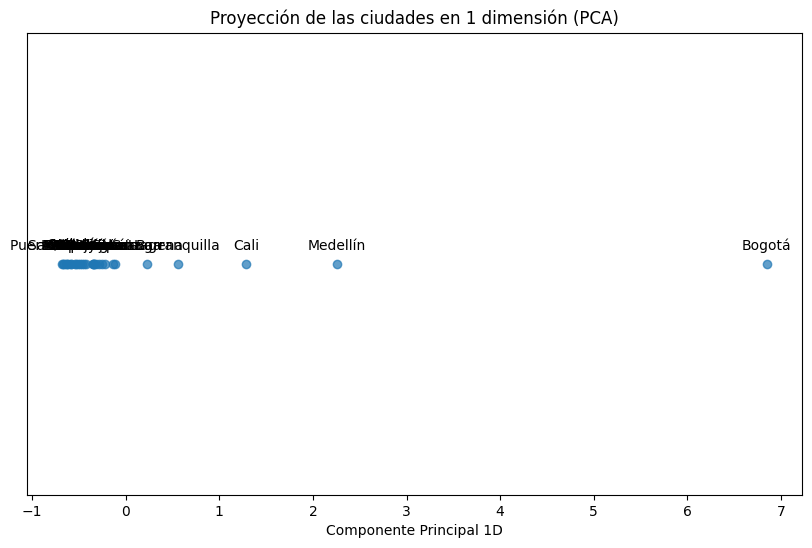

In [48]:
ciudades = df['City']

# Crear un gráfico de dispersión en 1D
plt.figure(figsize=(10, 6))
plt.scatter(proyeccion_1d, [0] * len(proyeccion_1d), alpha=0.7)  # El eje y es 0 para todas las ciudades
plt.yticks([])  # Ocultar el eje Y, ya que solo necesitamos una dimensión
plt.title("Proyección de las ciudades en 1 dimensión (PCA)")
plt.xlabel("Componente Principal 1D")

# Añadir etiquetas de las ciudades
for i, city in enumerate(ciudades):
    plt.annotate(city, (proyeccion_1d[i], 0), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

## 2.8

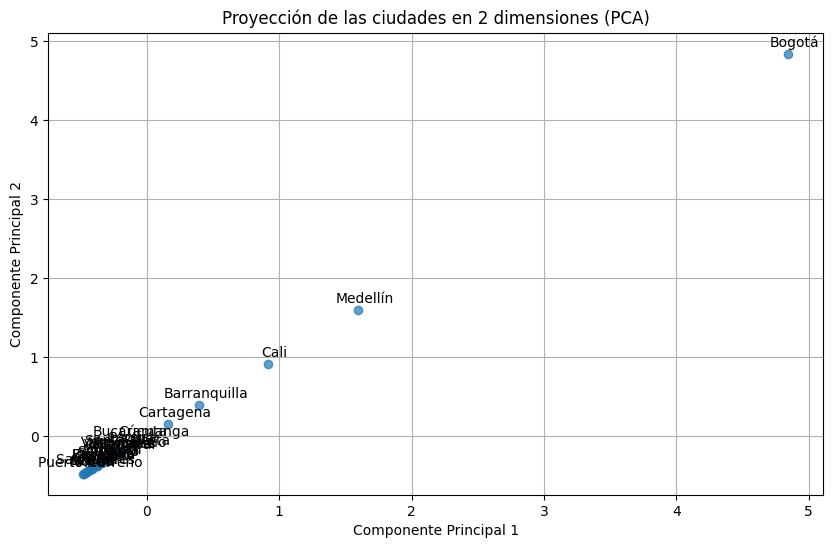

In [49]:
# Crear un gráfico de dispersión en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.7)

# Añadir etiquetas de las ciudades
for i, city in enumerate(ciudades):
    plt.annotate(city, (X_reconstructed[i, 0], X_reconstructed[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title("Proyección de las ciudades en 2 dimensiones (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.grid(True)
plt.show()